# House Price Version 3

Kaggle project:

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview

Combine V1 and V2 to have my own version. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew #for some statistics

from sklearn.model_selection import KFold
import sklearn.metrics

In [2]:
ls

House_Price_v1.ipynb      Untitled.ipynb            submission_baseline2.csv
House_Price_v2.ipynb      data/                     submission_ensemble.csv
House_Price_v3.ipynb      data_description.txt      test1.ipynb


In [3]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')

In [4]:
print(df_train.shape)
print(df_test.shape)

(1460, 81)
(1459, 80)


In [5]:
pd.set_option('display.max_columns', None)
df_train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

In [6]:
#Save the 'Id' column
train_id = df_train['Id']
test_id = df_test['Id']

#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
df_train.drop("Id", axis = 1, inplace = True)
df_test.drop("Id", axis = 1, inplace = True)

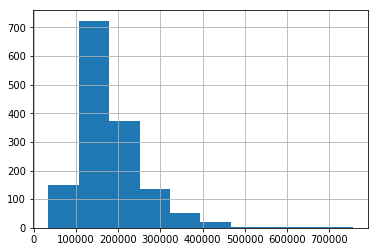

In [7]:
df_train.SalePrice.hist()

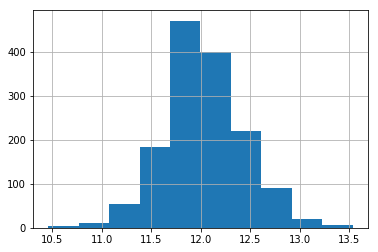

In [8]:
# Log-transformation of the target variable

df_train["SalePrice"] = np.log1p(df_train["SalePrice"])
df_train.SalePrice.hist()

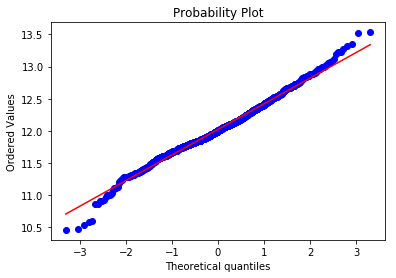

In [9]:
#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)
plt.show()

## Missing Data

In [10]:
ntrain = df_train.shape[0]
ntest = df_test.shape[0]
y_train = df_train.SalePrice.values
all_data = pd.concat((df_train, df_test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2919, 79)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


In [11]:
all_data

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,GLQ,Unf,1.0,0.0,Gd,150.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,NaN,0,PConc,2,Typ,548.0,2.0,TA,RFn,TA,Attchd,2003.0,1710,1,GasA,Ex,2Story,1,Gd,Lvl,Gtl,8450,Inside,65.0,Reg,0,60,RL,196.0,BrkFace,NaN,0,2,CollgCr,61,5,7,Y,0,NaN,CompShg,Gable,Normal,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,ALQ,Unf,0.0,1.0,Gd,284.0,Y,Feedr,Norm,SBrkr,0,TA,TA,MetalSd,MetalSd,NaN,TA,1,CBlock,2,Typ,460.0,2.0,TA,RFn,TA,Attchd,1976.0,1262,0,GasA,Ex,1Story,1,TA,Lvl,Gtl,9600,FR2,80.0,Reg,0,20,RL,0.0,None,NaN,0,5,Veenker,0,8,6,Y,0,NaN,CompShg,Gable,Normal,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,GLQ,Unf,1.0,0.0,Gd,434.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,TA,1,PConc,2,Typ,608.0,2.0,TA,RFn,TA,Attchd,2001.0,1786,1,GasA,Ex,2Story,1,Gd,Lvl,Gtl,11250,Inside,68.0,IR1,0,60,RL,162.0,BrkFace,NaN,0,9,CollgCr,42,5,7,Y,0,NaN,CompShg,Gable,Normal,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,ALQ,Unf,1.0,0.0,TA,540.0,Y,Norm,Norm,SBrkr,272,TA,TA,Wd Sdng,Wd Shng,NaN,Gd,1,BrkTil,1,Typ,642.0,3.0,TA,Unf,TA,Detchd,1998.0,1717,0,GasA,Gd,2Story,1,Gd,Lvl,Gtl,9550,Corner,60.0,IR1,0,70,RL,0.0,None,NaN,0,2,Crawfor,35,5,7,Y,0,NaN,CompShg,Gable,Abnorml,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,GLQ,Unf,1.0,0.0,Gd,490.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,TA,1,PConc,2,Typ,836.0,3.0,TA,RFn,TA,Attchd,2000.0,2198,1,GasA,Ex,2Story,1,Gd,Lvl,Gtl,14260,FR2,84.0,IR1,0,60,RL,350.0,BrkFace,NaN,0,12,NoRidge,84,5,8,Y,0,NaN,CompShg,Gable,Normal,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008
5,796,566,320,NaN,1,1Fam,TA,No,732.0,0.0,GLQ,Unf,1.0,0.0,Gd,64.0,Y,Norm,Norm,SBrkr,0,TA,TA,VinylSd,VinylSd,MnPrv,NaN,0,Wood,1,Typ,480.0,2.0,TA,Unf,TA,Attchd,1993.0,1362,1,GasA,Ex,1.5Fin,1,TA,Lvl,Gtl,14115,Inside,85.0,IR1,0,50,RL,0.0,None,Shed,700,10,Mitchel,30,5,5,Y,0,NaN,CompShg,Gable,Normal,WD,0,Pave,5,796.0,AllPub,40,1993,1995,2009
6,1694,0,0,NaN,3,1Fam,TA,Av,1369.0,0.0,GLQ,Unf,1.0,0.0,Ex,317.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,Gd,1,PConc,2,Typ,636.0,2.0,TA,RFn,TA,Attchd,2004.0,1694,0,GasA,Ex,1Story,1,Gd,Lvl,Gtl,10084,Inside,75.0,Reg,0,20,RL,186.0,Stone,NaN,0,8,Somerst,57,5,8,Y,0,NaN,CompShg,Gable,Normal,WD,0,Pave,7,1686.0,AllPub,255,2004,2005,2007
7,1107,983,0,NaN,3,1Fam,TA,Mn,859.0,32.0,ALQ,BLQ,1.0,0.0,Gd,216.0,Y,PosN,Norm,SBrkr,228,TA,TA,HdBoard,HdBoard,NaN,TA,2,CBlock,2,Typ,484.0,2.0,TA,RFn,TA,Attchd,1973.0,2090,1,GasA,Ex,2Story,1,TA,Lvl,Gtl,10382,Corner,NaN,IR1,0,60,RL,240.0,Stone,Shed,350,11,NWAmes,204,6,7,Y,0,NaN,CompShg,Gable,Normal,WD,0,Pave,7,1107.0,AllPub,235,1973,1973,2009
8,1022,752,0,NaN,2,1Fam,TA,No,0.0,0.0,Unf,Unf,0.0,0.0,TA,952.0,Y,Artery,Norm,FuseF,205,TA,TA,BrkFace,Wd Shng,NaN,TA,2,BrkTil,2,Min1,468.0,2.0,TA,Unf,Fa,Detchd,1931.0,1774,0,GasA,Gd,1.5Fin,2,TA,Lvl,Gtl,6120,Inside,51.0,Reg,0,50,RM,0.0,None,NaN,0,4,OldTown,0,5,7,Y,0,NaN,CompShg,Gable,Abnorml,WD,0,Pave,8,952.0,AllPub,90,1931,1950,2008
9,1077,0,0,NaN,2,2fmCon,TA,No,851.0,0.0,GLQ,Unf,1.0,0.0,TA,140.0,Y,Artery,Artery,SBrkr,0,TA,TA,MetalSd,MetalSd,NaN,TA,2,BrkTil,1,Typ,205.0,1.0,

In [12]:
all_data['PoolQC'] = all_data["PoolQC"].fillna("None")
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")
all_data["Alley"] = all_data["Alley"].fillna("None")
all_data["Fence"] = all_data["Fence"].fillna("None")

all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")
all_data['LotFrontage'] = all_data.groupby("Neighborhood")["LotFrontage"]\
                         .transform(lambda x: x.fillna(x.median()))

for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')
    
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)
    
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)
    
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')
    
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

all_data["MSZoning"] = all_data["MSZoning"].fillna(all_data['MSZoning'].mode()[0])
all_data = all_data.drop('Utilities',axis=1)

all_data["Functional"] = all_data["Functional"].fillna('Typ')

all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

In [13]:
all_data.isnull().sum()

1stFlrSF         0
2ndFlrSF         0
3SsnPorch        0
Alley            0
BedroomAbvGr     0
BldgType         0
BsmtCond         0
BsmtExposure     0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtFinType1     0
BsmtFinType2     0
BsmtFullBath     0
BsmtHalfBath     0
BsmtQual         0
BsmtUnfSF        0
CentralAir       0
Condition1       0
Condition2       0
Electrical       0
EnclosedPorch    0
ExterCond        0
ExterQual        0
Exterior1st      0
Exterior2nd      0
Fence            0
FireplaceQu      0
Fireplaces       0
Foundation       0
FullBath         0
                ..
LotConfig        0
LotFrontage      0
LotShape         0
LowQualFinSF     0
MSSubClass       0
MSZoning         0
MasVnrArea       0
MasVnrType       0
MiscFeature      0
MiscVal          0
MoSold           0
Neighborhood     0
OpenPorchSF      0
OverallCond      0
OverallQual      0
PavedDrive       0
PoolArea         0
PoolQC           0
RoofMatl         0
RoofStyle        0
SaleCondition    0
SaleType    

## Feature Engineering

In [14]:
#MSSubClass=The building class
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
all_data['OverallCond'] = all_data['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

In [15]:
# Adding total sqfootage feature 
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

### Check Categorical, Integer and Float Features

In [16]:
cate_list = list(all_data.select_dtypes('object').columns)
cate_value = []
missing = []

for cate in cate_list:    
    cate_value.append(len(all_data[cate].unique()))
    missing.append(all_data[cate].isnull().sum())
    
df_cate = pd.DataFrame({'category':cate_list, 'value':cate_value, 'missing':missing})\
        .sort_values('value',ascending=False)
df_cate

,category,value,missing
36,Neighborhood,25,0
14,Exterior2nd,16,0
31,MSSubClass,16,0
13,Exterior1st,15,0
35,MoSold,12,0
37,OverallCond,9,0
8,Condition1,9,0
43,SaleType,9,0
40,RoofMatl,8,0
9,Condition2,8,0


In [17]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2919, 339)


## Correlation

In [18]:
train = all_data[:ntrain]
test = all_data[ntrain:]

In [19]:
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

In [20]:
train['SalePrice'] = y_train

In [21]:
correlations = train.corr()['SalePrice'].sort_values()

In [22]:
# Most Positive Correlations:

correlations.tail(15)

ExterQual_Gd        0.509675
Foundation_PConc    0.530840
TotRmsAbvGrd        0.534422
YearRemodAdd        0.565608
YearBuilt           0.586570
FullBath            0.594771
1stFlrSF            0.596981
TotalBsmtSF         0.612134
GarageArea          0.650888
GarageCars          0.680625
GrLivArea           0.700927
TotalSF             0.777297
OverallQual         0.817185
SalePrice           1.000000
MSSubClass_150           NaN
Name: SalePrice, dtype: float64

In [23]:
# Most Negative Correlations

correlations.head(15)

ExterQual_TA        -0.595882
KitchenQual_TA      -0.538237
FireplaceQu_None    -0.510026
BsmtQual_TA         -0.477611
GarageFinish_Unf    -0.432012
GarageType_Detchd   -0.388638
MasVnrType_None     -0.387818
CentralAir_N        -0.351599
MSZoning_RM         -0.347446
Foundation_CBlock   -0.337815
HeatingQC_TA        -0.335429
MSSubClass_30       -0.329211
GarageFinish_None   -0.322998
GarageCond_None     -0.322998
GarageType_None     -0.322998
Name: SalePrice, dtype: float64

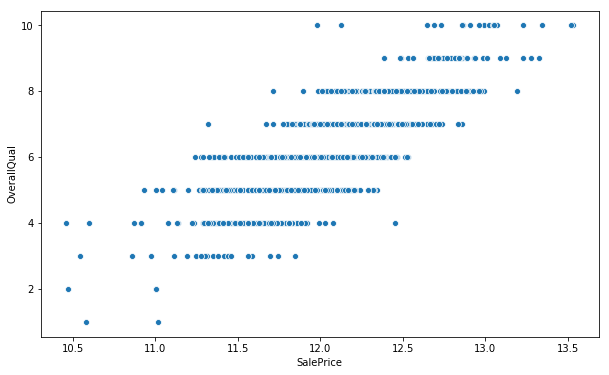

In [24]:
plt.figure(figsize = (10, 6))
sns.scatterplot(x="SalePrice", y="OverallQual", data=train)
plt.show()

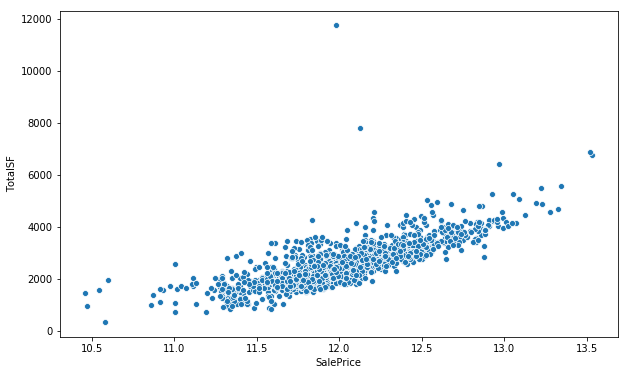

In [25]:
plt.figure(figsize = (10, 6))
sns.scatterplot(x="SalePrice", y="TotalSF", data=train)
plt.show()

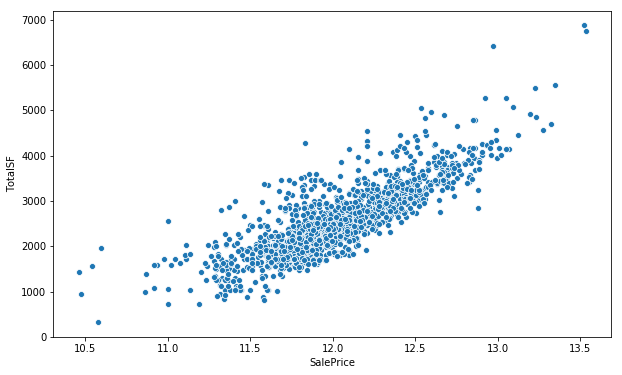

In [26]:
train = train[train.TotalSF < 7000].reset_index(drop=True)
plt.figure(figsize = (10, 6))
sns.scatterplot(x="SalePrice", y="TotalSF", data=train)
plt.show()

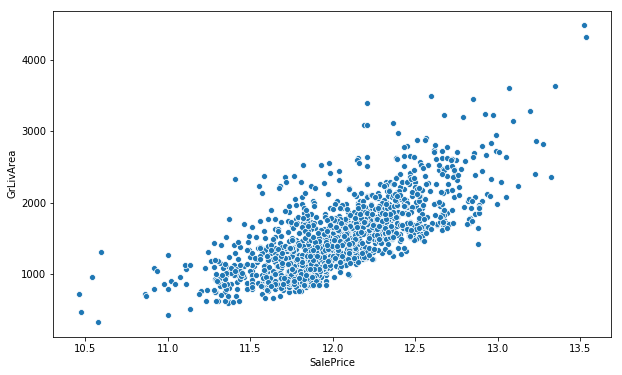

In [27]:
plt.figure(figsize = (10, 6))
sns.scatterplot(x="SalePrice", y="GrLivArea", data=train)
plt.show()

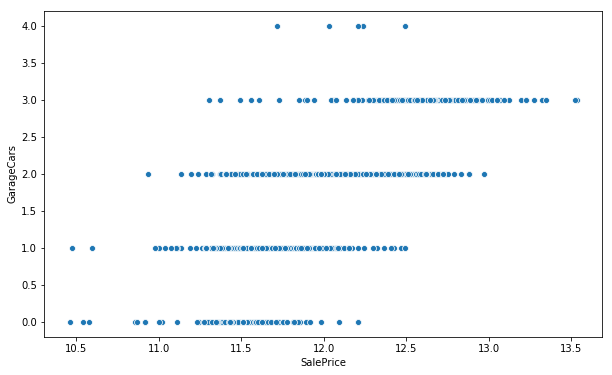

In [28]:
plt.figure(figsize = (10, 6))
sns.scatterplot(x="SalePrice", y="GarageCars", data=train)
plt.show()

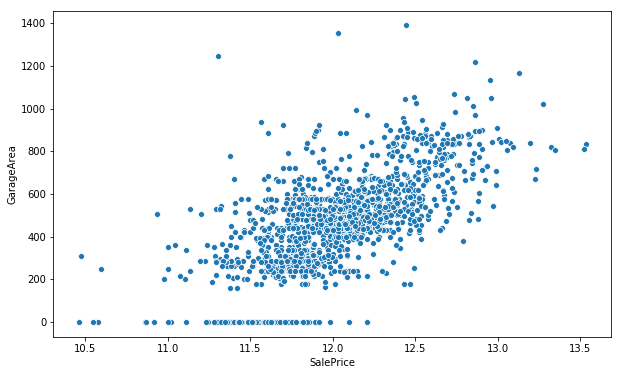

In [29]:
plt.figure(figsize = (10, 6))
sns.scatterplot(x="SalePrice", y="GarageArea", data=train)
plt.show()

## Collinear Feature

In [30]:
corrs = all_data.corr()

# Set the threshold
threshold = 0.8

# Empty dictionary to hold correlated variables
above_threshold_vars = {}

# For each column, record the variables that are above the threshold
for col in corrs:
    
    #print(col)
    #print(list(corrs.index[corrs[col] > threshold]))
    above_threshold_vars[col] = list(corrs.index[corrs[col] > threshold])

In [31]:
# Track columns to remove and columns already examined
cols_to_remove = []
cols_seen = []
cols_to_remove_pair = []

# Iterate through columns and correlated columns
for key, value in above_threshold_vars.items():
    
    #print(key,value)
    cols_seen.append(key)
    for x in value:
        if x == key:
            next
        else:
            # Only want to remove one in a pair
            if x not in cols_seen:
                cols_to_remove.append(x)
                cols_to_remove_pair.append(key)
                
cols_to_remove = list(set(cols_to_remove))
print('Number of columns to remove: ', len(cols_to_remove))
cols_to_remove_pair = list(set(cols_to_remove_pair))
print('Number of columns to remove pair: ', len(cols_to_remove_pair))

cols_to_remove

Number of columns to remove:  25
Number of columns to remove pair:  25


['MSSubClass_190',
 'HouseStyle_2Story',
 'SaleType_New',
 'BsmtQual_None',
 'Exterior2nd_VinylSd',
 'GarageType_None',
 'GarageFinish_None',
 'GarageCars',
 'MSSubClass_45',
 'Exterior2nd_AsbShng',
 'MSSubClass_90',
 'BsmtFinType1_None',
 'Exterior2nd_HdBoard',
 'Exterior2nd_Wd Sdng',
 'Exterior2nd_MetalSd',
 'TotalSF',
 'TotRmsAbvGrd',
 'BsmtExposure_None',
 'TotalBsmtSF',
 'Neighborhood_Somerst',
 'BsmtFinType2_None',
 'MSSubClass_50',
 'MSSubClass_80',
 'Exterior2nd_CmentBd',
 'GarageQual_None']

In [32]:
train = train.drop(columns = cols_to_remove)
test = test.drop(columns = cols_to_remove)

print(train.shape)
print(test.shape)

(1458, 315)
(1459, 314)


# Machine Learning Modeling

In [35]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

labels = train['SalePrice']
train = train.drop('SalePrice',axis=1)

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(train)
train = imputer.transform(train)
test = imputer.transform(test)


scaler = MinMaxScaler(feature_range = (0, 1))

scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

## Baseline Model

In [36]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 200, max_depth = 10, random_state=43)

rf.fit(train,labels)
prediction = rf.predict(test)
prediction = np.expm1(prediction)

submission = pd.DataFrame({'Id': test_id, 'SalePrice': prediction})
submission.to_csv('submission_baseline2.csv',index=False)

## LightGBM

In [37]:
import lightgbm as lgb

In [39]:
n_folds = 5

k_fold = KFold(n_splits = n_folds, shuffle = False, random_state = 50)

i = 0

predictions = np.zeros(test.shape[0])

for train_indices, valid_indices in k_fold.split(train):
    
    # Training data for the fold
    train_features, train_labels = train[train_indices], labels[train_indices]
    
    # Validation data for the fold
    valid_features, valid_labels = train[valid_indices], labels[valid_indices]
    
    
    # Create the model
    
    model = lgb.LGBMRegressor(boosting_type='gbdt', objective='regression', num_leaves=1200,
                                learning_rate=0.15, n_estimators=20000, max_depth=5,
                                metric='rmse', bagging_fraction=0.8, feature_fraction=0.8, reg_lambda=0.1)


    # Train the model
    model.fit(train_features, train_labels, eval_metric = 'rmse',
              eval_set = [(valid_features, valid_labels), (train_features, train_labels)],
              eval_names = ['valid', 'train'], early_stopping_rounds = 100, verbose = 200)

    # Record the best iteration
    best_iteration = model.best_iteration_
    
    
    valid_pred = model.predict(valid_features)
    
    print(i, "R2 Score: ", sklearn.metrics.r2_score(valid_pred,valid_labels))
    
    predictions += model.predict(test)/k_fold.n_splits
    
    i+=1

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[52]	train's rmse: 0.0795144	valid's rmse: 0.121167
0 R2 Score:  0.8959325974831265
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[76]	train's rmse: 0.0622728	valid's rmse: 0.129911
1 R2 Score:  0.8858398844661015
Training until validation scores don't improve for 100 rounds
[200]	train's rmse: 0.0391804	valid's rmse: 0.138967
Early stopping, best iteration is:
[115]	train's rmse: 0.0554097	valid's rmse: 0.137848
2 R2 Score:  0.8633008321528705
Training until validation scores don't improve for 100 rounds
[200]	train's rmse: 0.0402336	valid's rmse: 0.121088
Early stopping, best iteration is:
[185]	train's rmse: 0.0427558	valid's rmse: 0.120637
3 R2 Score:  0.8869063013750015
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[64]	train's rmse: 0.0730358	valid's rmse: 0.125835
4 R2 Score:  0.8888

In [40]:
predictions

array([11.74851002, 11.92945298, 12.13638543, ..., 11.97036625,
       11.64092554, 12.32108899])

In [43]:
predictions1 = np.expm1(predictions)
submission = pd.DataFrame({'Id': test_id, 'SalePrice': predictions1})
submission.to_csv('submission_lightgbm_v2.csv',index=False)

## Other models

In [45]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error

In [59]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train)
    rmse= np.sqrt(-cross_val_score(model, train, labels, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [46]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

In [47]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

In [48]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

In [49]:
# Gradient Boosting Regression

GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [51]:
# XGBoost
import xgboost as xgb

model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [52]:
# LightGBM :

model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

### Averaged base models class

In [53]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

In [60]:
averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.1113 (0.0073)



## Less simple Stacking : Adding a Meta-model

In [61]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [62]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR),
                                                 meta_model = lasso)

In [63]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [64]:
stacked_averaged_models.fit(train, labels)
stacked_train_pred = stacked_averaged_models.predict(train)

In [65]:
stacked_pred = np.expm1(stacked_averaged_models.predict(test))
print(rmsle(labels, stacked_train_pred))

0.0827266512231253


In [66]:
# XGBoost

model_xgb.fit(train, labels)
xgb_train_pred = model_xgb.predict(train)
xgb_pred = np.expm1(model_xgb.predict(test))
print(rmsle(labels, xgb_train_pred))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


0.08075587130100906


In [67]:
# LightGBM

model_lgb.fit(train, labels)
lgb_train_pred = model_lgb.predict(train)
lgb_pred = np.expm1(model_lgb.predict(test))
print(rmsle(labels, lgb_train_pred))

0.07492965325295908


In [70]:
ensemble = stacked_pred*0.70 + xgb_pred*0.15 + lgb_pred*0.15

sub = pd.DataFrame()
sub['Id'] = test_id
sub['SalePrice'] = ensemble
sub.to_csv('submission_ensemble_v1.csv',index=False)

In [71]:
ensemble = stacked_pred*0.15 + xgb_pred*0.15 + lgb_pred*0.7

sub = pd.DataFrame()
sub['Id'] = test_id
sub['SalePrice'] = ensemble
sub.to_csv('submission_ensemble_v2.csv',index=False)